# Load data and keep 2019 timepoint

In [19]:
import pandas as pd

df_covid_AP = pd.read_csv('../lung_pollution/data/covid_pollution_clean02.csv')

df_covid_AP.drop(columns=['Unnamed: 0'], inplace = True)
df_covid_AP = df_covid_AP.rename(columns={"PM2.5_annualMean": "PM2_5_annualMean", "Fully vaccinated": "Fully_vaccinated", "Population density": "Population_density"})

In [20]:
df_covid_AP.shape

(4000, 23)

In [21]:
df_covid_AP.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k',
       'fully_vaccinated', 'Population_density'],
      dtype='object')

In [22]:
df_covid_AP.sort_values(['year'], axis=0, ascending=False,inplace=True,ignore_index=True)
df_covid_AP_2019 = df_covid_AP[0:400]

# Feature Engineering

In [37]:
df_num = df_covid_AP_2019[['NO2_annualMean','NO_annualMean',
       'O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean', 'fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]
df_num.shape

(400, 9)

In [38]:
import numpy as np
df_num[['lnNO2']] = np.log(df_num[['NO2_annualMean']])
#df_num[['lnNO']] = np.log(df_num[['NO_annualMean']])
df_num[['lnO3']] = np.log(df_num[['O3_daily8HrMax']])
df_num[['lnPM2_5']] = np.log(df_num[['PM2_5_annualMean']])
df_num.shape

(400, 12)

In [51]:
AP = df_num['NO2_annualMean'] * df_num['NO_annualMean'] * df_num['O3_daily8HrMax'] * df_num['PM2_5_annualMean']
type(AP)

pandas.core.series.Series

In [52]:
df_num = df_num.assign(AirPollution=AP.values)


In [54]:
df_num.columns

Index(['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean', 'fully_vaccinated', 'Population_density',
       'cases_per_100k', 'deaths_per_100k', 'lnNO2', 'lnO3', 'lnPM2_5',
       'AirPollution'],
      dtype='object')

In [71]:
X = df_num[['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean', 'fully_vaccinated', 'Population_density',
       'lnNO2', 'lnO3', 'lnPM2_5',
       'AirPollution']]
y_cases = df_num[['cases_per_100k']]
y_mort = df_num[['deaths_per_100k']]
X_columns = X.columns

# StandardScale features

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciate Standard Scaler

scaler.fit(X)  # Fit scaler to feature
X = scaler.transform(X)  #Scale

X = pd.DataFrame(X, columns = X_columns)

In [59]:
X

,NO2_annualMean,NO_annualMean,O3_daily8HrMax,PM10_annualMean,PM2_5_annualMean,fully_vaccinated,Population_density,lnNO2,lnO3,lnPM2_5,AirPollution
0,-1.543452,-1.904518,0.355193,-2.651268,0.379834,1.210982,0.379764,-1.502957,0.415398,0.390503,-1.295998
1,0.086284,0.144845,-0.253036,0.546586,0.352804,0.754841,-0.609937,0.223277,-0.233804,0.367320,-0.035529
2,0.391001,0.497396,-0.271276,0.602552,0.405665,1.210982,-0.480630,0.451890,-0.253784,0.412594,0.314654
3,0.147208,0.190353,-0.275140,0.422992,0.322643,-0.271475,-0.585807,0.270557,-0.258020,0.341371,0.008075
4,0.145654,0.178550,-0.236657,0.701807,0.496464,0.754841,-0.400735,0.269361,-0.215890,0.489758,0.030883
...,...,...,...,...,...,...,...,...,...,...,...
395,1.174326,0.379261,1.747835,1.806261,-0.090587,0.156157,2.456629,0.963754,1.789906,-0.023044,0.780286
396,-2.215943,-1.854675,-0.764862,-0.606853,-1.244245,-0.214457,-0.679160,-2.746695,-0.806443,-1.139947,-1.323401
397,-0.014089,0.109886,-0.252577,0.515375,0.313210,1.496070,0.858517,0.143533,-0.233302,0.333237,-0.099529
398,-0.046273,-0.018334,-0.234994,0.615920,0.439916,-1.582879,-0.713592,0.117457,-0.214072,0.441790,-0.165847


# Analyze distribution of features and targets

In [68]:
X_columns

Index(['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean', 'fully_vaccinated', 'Population_density', 'lnNO2',
       'lnO3', 'lnPM2_5', 'AirPollution'],
      dtype='object')

In [69]:
#numerical features
feature_list = ['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean', 'fully_vaccinated', 'Population_density', 'lnNO2',
       'lnO3', 'lnPM2_5', 'AirPollution']

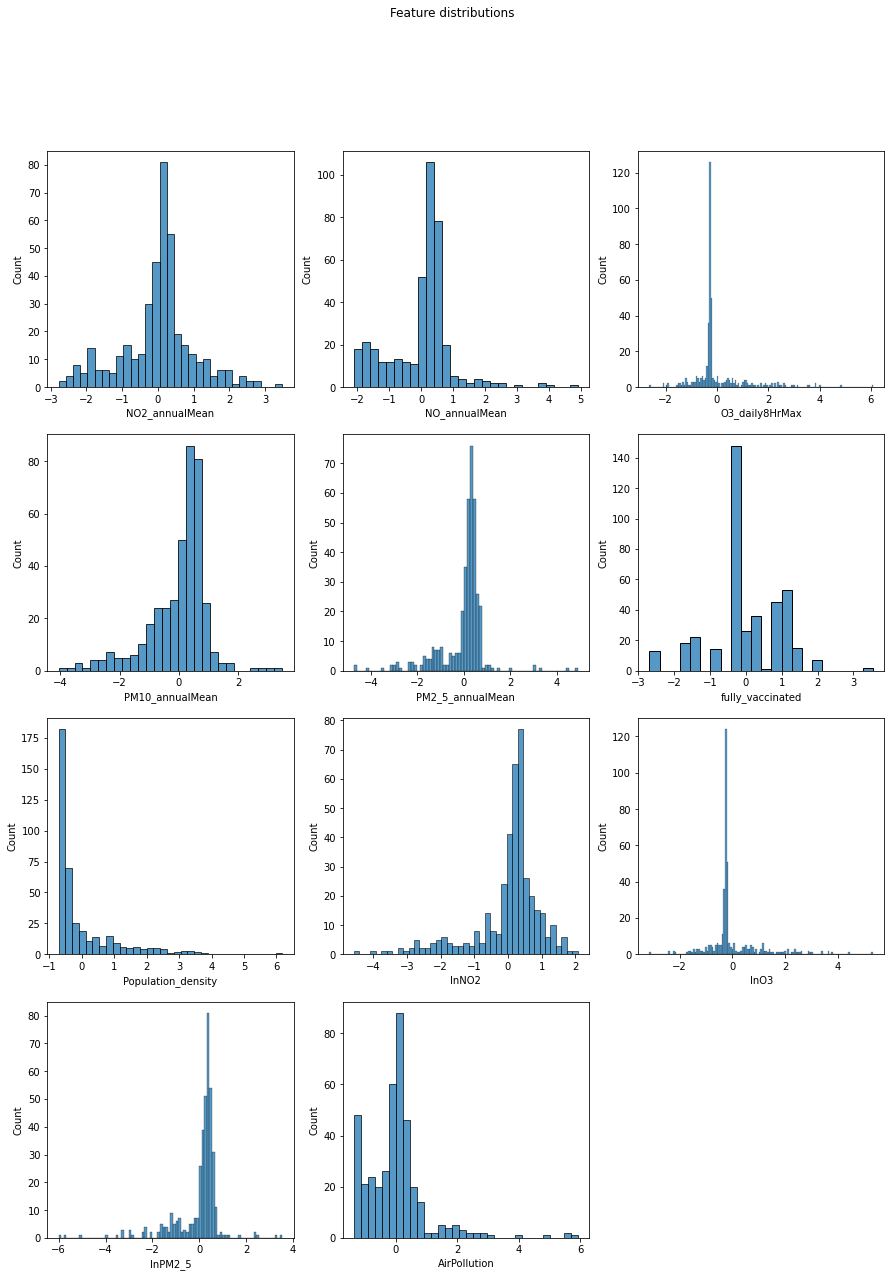

In [70]:
#check distribution of numerical features 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(4,3,i+1)
    sns.histplot(X[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

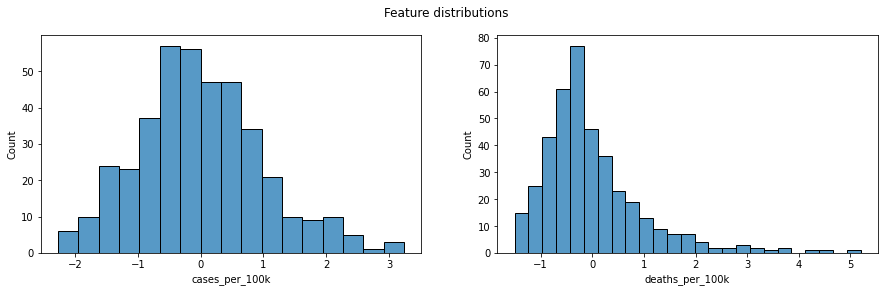

In [20]:
#check distribution of targets

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

for i, feature in enumerate(target_list):
    # First subplot
    plt.subplot(1,2,i+1)
    sns.histplot(df_covid_AP_2019[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

# Visual analysis of feature-target correlation

## Target: deaths per 100k

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data

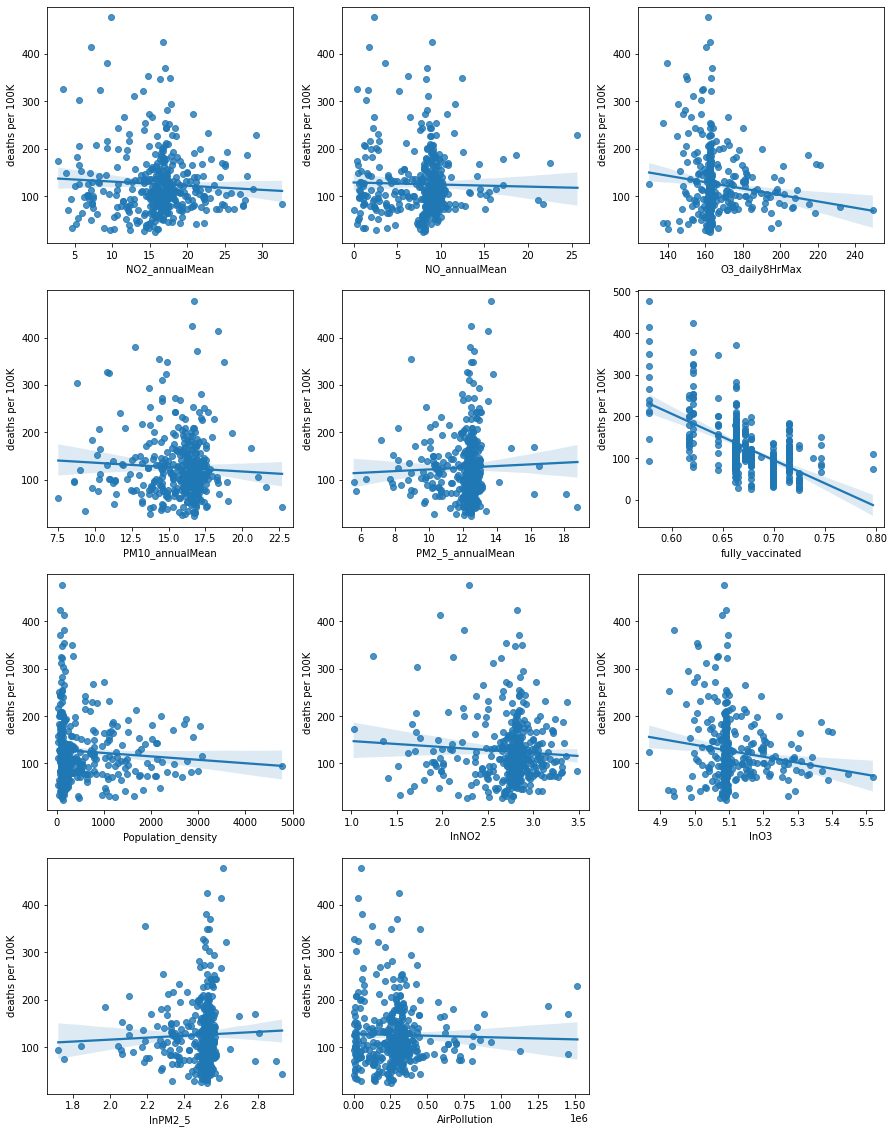

In [73]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(X_columns):
    # First subplot
    plt.subplot(4,3,i+1)
    sns.regplot(X[feature], y_mort)
    plt.xlabel(feature)
    plt.ylabel("deaths per 100K")
    # Global figure methods
plt.show()

## Target: cases per 100k

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data

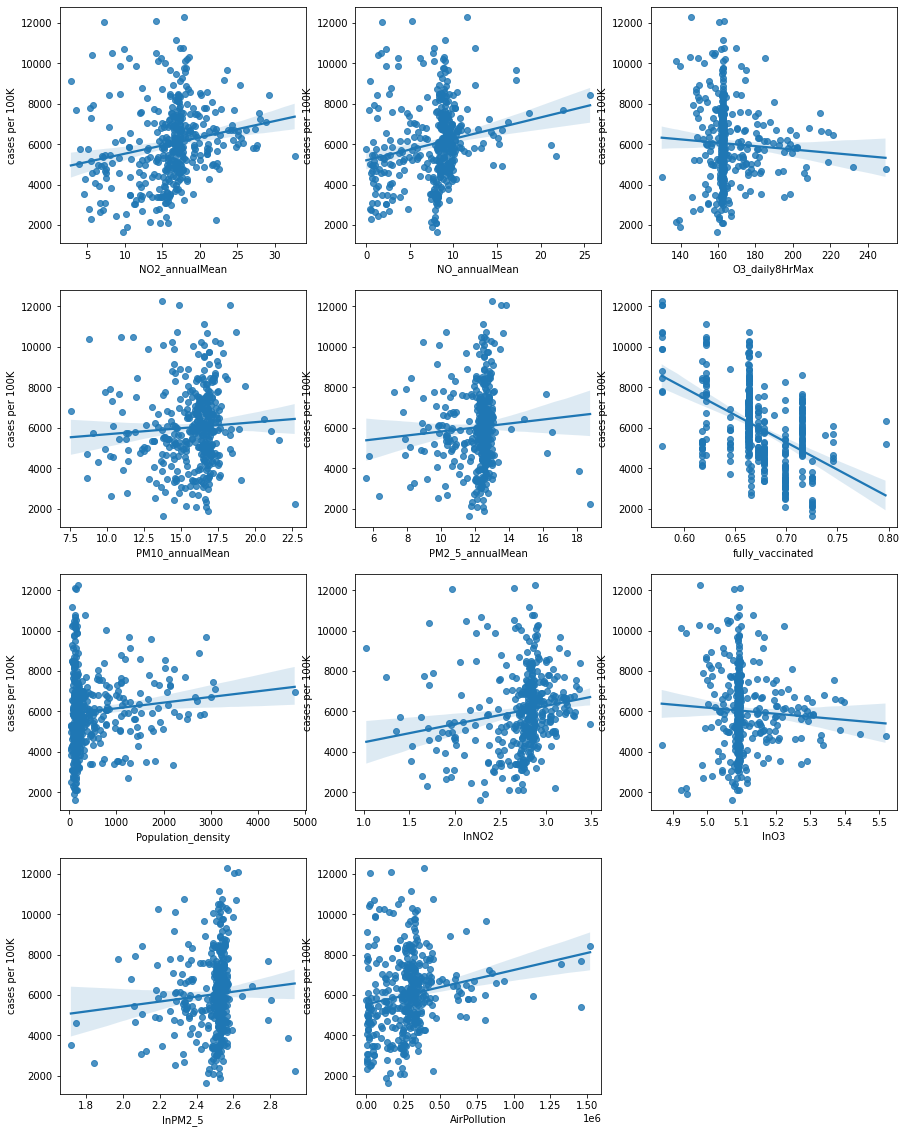

In [74]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(4,3,i+1)
    sns.regplot(X[feature], y_cases)
    plt.xlabel(feature)
    plt.ylabel("cases per 100K")
    # Global figure methods
plt.show()

## Correlation plot

In [75]:
X_columns

Index(['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean', 'fully_vaccinated', 'Population_density', 'lnNO2',
       'lnO3', 'lnPM2_5', 'AirPollution'],
      dtype='object')

<AxesSubplot:>

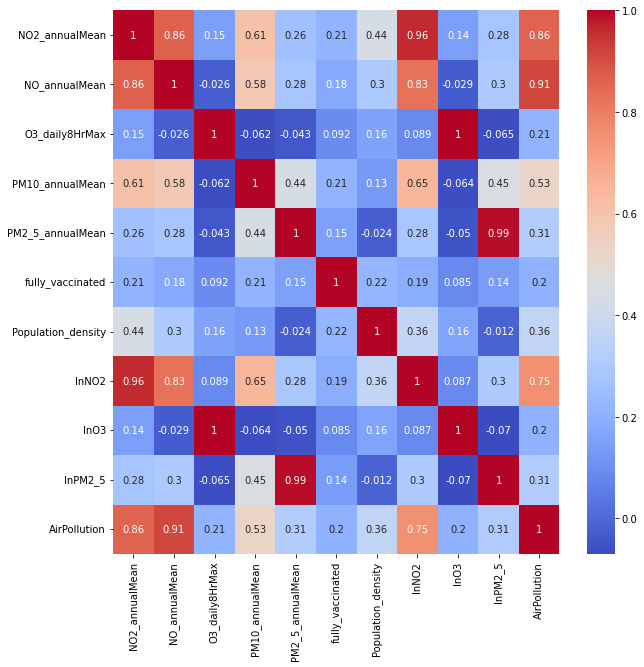

In [77]:
import seaborn as sns
plt.figure(figsize = (10,10))

sns.heatmap(X[['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean', 'fully_vaccinated', 'Population_density', 'lnNO2',
       'lnO3', 'lnPM2_5', 'AirPollution']].corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

In [78]:
X[['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean', 'fully_vaccinated', 'Population_density', 'lnNO2',
       'lnO3', 'lnPM2_5', 'AirPollution']].corr()

,NO2_annualMean,NO_annualMean,O3_daily8HrMax,PM10_annualMean,PM2_5_annualMean,fully_vaccinated,Population_density,lnNO2,lnO3,lnPM2_5,AirPollution
NO2_annualMean,1.000000,0.862425,0.146795,0.610912,0.259602,0.210495,0.436260,0.960156,0.144281,0.275386,0.861656
NO_annualMean,0.862425,1.000000,-0.025597,0.581974,0.280956,0.178809,0.295168,0.827828,-0.028743,0.296108,0.912619
O3_daily8HrMax,0.146795,-0.025597,1.000000,-0.062021,-0.043136,0.092072,0.159191,0.088680,0.996858,-0.065281,0.211059
PM10_annualMean,0.610912,0.581974,-0.062021,1.000000,0.436387,0.211284,0.132580,0.646126,-0.064484,0.450509,0.527248
PM2_5_annualMean,0.259602,0.280956,-0.043136,0.436387,1.000000,0.148221,-0.024332,0.281394,-0.049681,0.987469,0.313701
fully_vaccinated,0.210495,0.178809,0.092072,0.211284,0.148221,1.000000,0.222453,0.191973,0.084646,0.137087,0.204457
Population_density,0.436260,0.295168,0.159191,0.132580,-0.024332,0.222453,1.000000,0.364943,0.160064,-0.012022,0.359205
lnNO2,0.960156,0.827828,0.088680,0.646126,0.281394,0.191973,0.364943,1.000000,0.087007,0.304145,0.754546
lnO3,0.144281,-0.028743,0.996858,-0.064484,-0.049681,0.084646,0.160064,0.087007,1.000000,-0.070145,0.204238
lnPM2_5,0.275386,0.296108,-0.065281,0.450509,0.987469,0.137087,-0.012022,0.304145,-0.070145,1.000000,0.308646


## VIF analysis

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [80]:
vif_df = X[['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM2_5_annualMean', 'fully_vaccinated', 'Population_density', 'lnNO2',
       'lnO3', 'lnPM2_5', 'AirPollution']]

In [81]:
df = pd.DataFrame()
df["vif_index"] = [vif(vif_df.values, i) for i in range(vif_df.shape[1])]
df["features"] = vif_df.columns
df

,vif_index,features
0,518.488588,NO2_annualMean
1,89.175774,NO_annualMean
2,651.152941,O3_daily8HrMax
3,128.022075,PM10_annualMean
4,3720.939498,PM2_5_annualMean
5,408.588642,fully_vaccinated
6,2.256098,Population_density
7,1696.293574,lnNO2
8,9463.893121,lnO3
9,17798.316993,lnPM2_5


# OLS: deaths per 100k

## Univariate linear regression

In [16]:
import statsmodels.formula.api as smf

### Vaccination status

In [17]:
model = smf.ols(formula = 'deaths_per_100k ~ Fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     198.8
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           6.67e-37
Time:                        15:52:47   Log-Likelihood:                -487.24
No. Observations:                 400   AIC:                             978.5
Df Residuals:                     398   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3971      0.042      9.345      0.000       0.314       0.481
Fully_vaccinated    -0.6099      0.043    -14.100      0.000      -0.695      -0.525
==============================================================================
Omnibus:                       93.260   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.962
Skew:                           1.190   Prob(JB):                     6.94e-46
Kurtosis:                       5.611   Cond. No.                         1.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import numpy as np
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8180470229308339

### Population density

In [19]:
model = smf.ols(formula = 'deaths_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.166
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.142
Time:                        15:52:47   Log-Likelihood:                -567.18
No. Observations:                 400   AIC:                             1138.
Df Residuals:                     398   BIC:                             1146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2752      0.055      4.961      0.000       0.166       0.384
Population_density    -0.0580      0.039     -1.472      0.142      -0.135       0.019
==============================================================================
Omnibus:                      147.676   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.709
Skew:                           1.697   Prob(JB):                    9.20e-106
Kurtosis:                       7.183   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.9990231363697876

### NO2

In [21]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.513
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.219
Time:                        15:52:47   Log-Likelihood:                -567.51
No. Observations:                 400   AIC:                             1139.
Df Residuals:                     398   BIC:                             1147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2323      0.051      4.600      0.000       0.133       0.332
NO2_annualMean    -0.0467      0.038     -1.230      0.219      -0.121       0.028
==============================================================================
Omnibus:                      146.022   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.285
Skew:                           1.680   Prob(JB):                    1.02e-103
Kurtosis:                       7.143   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.9998399120304602

### NO 

In [23]:
model = smf.ols(formula = 'deaths_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2121
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.645
Time:                        15:52:47   Log-Likelihood:                -568.16
No. Observations:                 400   AIC:                             1140.
Df Residuals:                     398   BIC:                             1148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2348      0.051      4.560      0.000       0.134       0.336
NO_annualMean    -0.0214      0.046     -0.461      0.645      -0.113       0.070
==============================================================================
Omnibus:                      150.597   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.003
Skew:                           1.724   Prob(JB):                    2.19e-110
Kurtosis:                       7.291   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1.0014711804123115

### Ozon

In [25]:
model = smf.ols(formula = 'deaths_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.893
Date:                Thu, 25 Nov 2021   Prob (F-statistic):             0.0156
Time:                        15:52:47   Log-Likelihood:                -565.33
No. Observations:                 400   AIC:                             1135.
Df Residuals:                     398   BIC:                             1143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2188      0.051      4.322      0.000       0.119       0.318
O3_annualMean     0.0747      0.031      2.427      0.016       0.014       0.135
==============================================================================
Omnibus:                      141.073   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              447.758
Skew:                           1.627   Prob(JB):                     5.90e-98
Kurtosis:                       7.034   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.9944036748745454

### PM2.5

In [27]:
model = smf.ols(formula = 'deaths_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5195
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.471
Time:                        15:52:47   Log-Likelihood:                -568.01
No. Observations:                 400   AIC:                             1140.
Df Residuals:                     398   BIC:                             1148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2499      0.052      4.806      0.000       0.148       0.352
PM2_5_annualMean     0.0171      0.024      0.721      0.471      -0.030       0.064
==============================================================================
Omnibus:                      150.330   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.425
Skew:                           1.721   Prob(JB):                    4.81e-110
Kurtosis:                       7.285   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1.0010848709133817

### PM10

In [29]:
model = smf.ols(formula = 'deaths_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.210
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.272
Time:                        15:52:47   Log-Likelihood:                -567.66
No. Observations:                 400   AIC:                             1139.
Df Residuals:                     398   BIC:                             1147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2240      0.052      4.287      0.000       0.121       0.327
PM10_annualMean    -0.0564      0.051     -1.100      0.272      -0.157       0.044
==============================================================================
Omnibus:                      152.501   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.876
Skew:                           1.734   Prob(JB):                    6.42e-115
Kurtosis:                       7.418   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1.000219336166327

## Multivariate linear regression

In [72]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean + NO_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     31.51
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.32e-34
Time:                        16:14:46   Log-Likelihood:                -478.99
No. Observations:                 400   AIC:                             974.0
Df Residuals:                     392   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4116      0.049      8.329      0.000       0.314       0.509
NO2_annualMean        -0.0228      0.073     -0.311      0.756      -0.167       0.121
NO_annualMean          0.0983      0.076      1.295      0.196      -0.051       0.248
O3_annualMean          0.0627      0.036      1.758      0.080      -0.007       0.133
PM10_annualMean        0.0263      0.058      0.452      0.652      -0.088       0.141
PM2_5_annualMean       0.0526      0.022      2.425      0.016       0.010       0.095
Fully_vaccinated      -0.6428      0.045    -14.346      0.000      -0.731      -0.555
Population_density     0.0565      0.037      1.517      0.130      -0.017       0.130
==============================================================================
Omnibus:                       91.540   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.404
Skew:                           1.144   Prob(JB):                     1.68e-47
Kurtosis:                       5.773   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8013431616309021

# OLS: cases per 100k

## Univariate linear regression

### Vaccination status

In [33]:
model = smf.ols(formula = 'cases_per_100k ~ Fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     126.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.15e-25
Time:                        15:52:47   Log-Likelihood:                -441.09
No. Observations:                 400   AIC:                             886.2
Df Residuals:                     398   BIC:                             894.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1749      0.038      4.619      0.000       0.100       0.249
Fully_vaccinated    -0.4334      0.039    -11.246      0.000      -0.509      -0.358
==============================================================================
Omnibus:                        9.286   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.798
Skew:                           0.203   Prob(JB):                       0.0334
Kurtosis:                       2.507   Cond. No.                         1.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.7289095065444727

### Population density

In [35]:
model = smf.ols(formula = 'cases_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.040
Date:                Thu, 25 Nov 2021   Prob (F-statistic):             0.0451
Time:                        15:52:47   Log-Likelihood:                -494.26
No. Observations:                 400   AIC:                             992.5
Df Residuals:                     398   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0233      0.046      0.505      0.614      -0.068       0.114
Population_density     0.0660      0.033      2.010      0.045       0.001       0.131
==============================================================================
Omnibus:                       19.867   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.482
Skew:                           0.532   Prob(JB):                     2.16e-05
Kurtosis:                       3.397   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8325225709089548

### NO2

In [37]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.55
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           5.71e-05
Time:                        15:52:47   Log-Likelihood:                -488.13
No. Observations:                 400   AIC:                             980.3
Df Residuals:                     398   BIC:                             988.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0844      0.041      2.037      0.042       0.003       0.166
NO2_annualMean     0.1267      0.031      4.069      0.000       0.065       0.188
==============================================================================
Omnibus:                       32.343   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.625
Skew:                           0.684   Prob(JB):                     4.10e-09
Kurtosis:                       3.669   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.819861836471156

### NO 

In [39]:
model = smf.ols(formula = 'cases_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.74
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           5.18e-05
Time:                        15:52:47   Log-Likelihood:                -488.04
No. Observations:                 400   AIC:                             980.1
Df Residuals:                     398   BIC:                             988.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1017      0.042      2.414      0.016       0.019       0.185
NO_annualMean     0.1556      0.038      4.092      0.000       0.081       0.230
==============================================================================
Omnibus:                       28.026   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.628
Skew:                           0.625   Prob(JB):                     8.22e-08
Kurtosis:                       3.630   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8196723460155986

### Ozon

In [41]:
model = smf.ols(formula = 'cases_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.009209
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.924
Time:                        15:52:47   Log-Likelihood:                -496.27
No. Observations:                 400   AIC:                             996.5
Df Residuals:                     398   BIC:                             1005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0640      0.043      1.503      0.134      -0.020       0.148
O3_annualMean    -0.0025      0.026     -0.096      0.924      -0.053       0.048
==============================================================================
Omnibus:                       14.642   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.206
Skew:                           0.458   Prob(JB):                     0.000499
Kurtosis:                       3.268   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.836727980915822

### PM2.5

In [43]:
model = smf.ols(formula = 'cases_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.947
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.164
Time:                        15:52:47   Log-Likelihood:                -495.30
No. Observations:                 400   AIC:                             994.6
Df Residuals:                     398   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0792      0.043      1.826      0.069      -0.006       0.164
PM2_5_annualMean     0.0277      0.020      1.395      0.164      -0.011       0.067
==============================================================================
Omnibus:                       13.223   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.595
Skew:                           0.437   Prob(JB):                      0.00112
Kurtosis:                       3.230   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8346986783678119

### PM10

In [45]:
model = smf.ols(formula = 'cases_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.540
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.215
Time:                        15:52:47   Log-Likelihood:                -495.50
No. Observations:                 400   AIC:                             995.0
Df Residuals:                     398   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0785      0.044      1.800      0.073      -0.007       0.164
PM10_annualMean     0.0532      0.043      1.241      0.215      -0.031       0.137
==============================================================================
Omnibus:                       15.420   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.121
Skew:                           0.465   Prob(JB):                     0.000316
Kurtosis:                       3.317   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8351230200768954

## Multivariate linear regression

In [73]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean + NO_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     34.50
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.12e-37
Time:                        16:14:54   Log-Likelihood:                -400.29
No. Observations:                 400   AIC:                             816.6
Df Residuals:                     392   BIC:                             848.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1832      0.041      4.515      0.000       0.103       0.263
NO2_annualMean         0.1725      0.060      2.866      0.004       0.054       0.291
NO_annualMean          0.1067      0.062      1.711      0.088      -0.016       0.229
O3_annualMean          0.1070      0.029      3.650      0.000       0.049       0.165
PM10_annualMean       -0.0071      0.048     -0.149      0.882      -0.101       0.087
PM2_5_annualMean       0.0336      0.018      1.886      0.060      -0.001       0.069
Fully_vaccinated      -0.5062      0.037    -13.755      0.000      -0.579      -0.434
Population_density     0.0859      0.031      2.809      0.005       0.026       0.146
==============================================================================
Omnibus:                       10.789   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.895
Skew:                           0.393   Prob(JB):                      0.00431
Kurtosis:                       3.192   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean + NO2_hrOver200 + NO_annualMean + O3_annualMean + O3_daysOver120 + O3_dailyMaxAnnualMean + O3_dailyHourlyMax + O3_daily8HrMax + PM10_annualMean + PM10_daysOver50 + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     24.33
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.25e-42
Time:                        15:52:48   Log-Likelihood:                -376.58
No. Observations:                 400   AIC:                             781.2
Df Residuals:                     386   BIC:                             837.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1542      0.044      3.532      0.000       0.068       0.240
NO2_annualMean            0.1644      0.066      2.473      0.014       0.034       0.295
NO2_hrOver200             0.0819      0.096      0.856      0.392      -0.106       0.270
NO_annualMean             0.0659      0.065      1.008      0.314      -0.063       0.194
O3_annualMean            -0.0651      0.049     -1.317      0.188      -0.162       0.032
O3_daysOver120            0.0700      0.037      1.886      0.060      -0.003       0.143
O3_dailyMaxAnnualMean     0.2177      0.051      4.239      0.000       0.117       0.319
O3_dailyHourlyMax        -0.0698      0.020     -3.517      0.000      -0.109      -0.031
O3_daily8HrMax            0.0361      0.021      1.750      0.081      -0.004       0.077
PM10_annualMean           0.0102      0.068      0.151      0.880      -0.123       0.143
PM10_daysOver50          -0.0220      0.108     -0.203      0.839      -0.235       0.191
PM2_5_annualMean          0.0422      0.017      2.430      0.016       0.008       0.076
Fully_vaccinated         -0.4145      0.039    -10.733      0.000      -0.490      -0.339
Population_density        0.1063      0.030      3.534      0.000       0.047       0.165
==============================================================================
Omnibus:                        7.006   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.889
Skew:                           0.316   Prob(JB):                       0.0319
Kurtosis:                       3.116   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df = pd.DataFrame()
df["vif_index"] = [vif(X.values, i) for i in range(X.shape[1])]
df["features"] = X.columns
df

,vif_index,features
0,5.803394,NO2_annualMean
1,4.284519,NO_annualMean
2,2.086602,O3_annualMean
3,2.136186,PM10_annualMean
4,1.355404,PM2_5_annualMean
5,1.129409,Fully_vaccinated
6,1.441051,Population_density


In [49]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.620346365222002

# Feature and target definition

In [9]:
X = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_annualMean', 'PM10_annualMean','PM2_5_annualMean', 'fully_vaccinated', 'Population_density']]
y_mort = df_covid_AP_2019[['deaths_per_100k']]
y_cases = df_covid_AP_2019[['cases_per_100k']]

# Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


## Deaths per 100k

In [52]:
linreg = LinearRegression().fit(X,y_mort)
linreg.score(X, y_mort)

0.3600754417489197

## Cases per 100k

In [85]:
linreg = LinearRegression()
cv_results = cross_validate(linreg, X, y_cases, cv=5, 
                            scoring='r2'
                            )
linreg = linreg.fit(X,y_cases)
print(cv_results['test_score'].mean())
print(linreg.score(X, y_cases))

0.294274173442226
0.3762585713016444


# Lasso, Ridge, LinReg, ElasticNet

## Cases per 100k

In [86]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet(alpha=0.2)
    
cv_results_linreg = cross_validate(linreg, X, y_cases, cv=5, 
                            scoring='r2'
                            )
cv_results_ridge = cross_validate(ridge, X, y_cases, cv=5, 
                            scoring='r2'
                            )
cv_results_lasso = cross_validate(lasso, X, y_cases, cv=5, 
                            scoring='r2'
                            )
cv_results_elastic = cross_validate(elastic, X, y_cases, cv=5, 
                            scoring='r2'
                            )

linreg = linreg.fit(X, y_cases)
ridge = ridge.fit(X, y_cases)
lasso = lasso.fit(X, y_cases)
elastic = elastic.fit(X, y_cases)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_[0], index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_[0], index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_[0], index= X.columns),
    "coef_elastic": pd.Series(elastic.coef_[0], index= X.columns)})\

# coefs\
#     .applymap(lambda x: int(x))\
#     .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

print('R2 LinReg: ', linreg.score(X,y_cases), 'R2 generalize: ', cv_results_linreg['test_score'].mean())
print('R2 Ridge: ', ridge.score(X,y_cases), 'R2 generalize: ', cv_results_ridge['test_score'].mean())
print('R2 Lasso: ', lasso.score(X,y_cases), 'R2 generalize: ', cv_results_lasso['test_score'].mean())
print('R2 Elastic: ', elastic.score(X,y_cases), 'R2 generalize: ', cv_results_elastic['test_score'].mean())

#pd.Series(linreg.coef_[0], index = X.columns)
coefs

R2 LinReg:  0.3762585713016444 R2 generalize:  0.294274173442226
R2 Ridge:  0.2258586054962467 R2 generalize:  0.15655720829964198
R2 Lasso:  0.3728436527145883 R2 generalize:  0.29942542600484545
R2 Elastic:  0.06799033422487699 R2 generalize:  0.025548257228471826


,coef_linreg,coef_ridge,coef_lasso,coef_elastic
NO2_annualMean,333.546861,220.350023,298.675273,88.869248
NO_annualMean,176.760689,104.155259,298.675273,88.869248
O3_daily8HrMax,98.127729,-8.514178,298.675273,88.869248
PM10_annualMean,-26.277300,-98.126879,298.675273,88.869248
PM2_5_annualMean,217.366644,84.169450,298.675273,88.869248
fully_vaccinated,-32246.524507,-9812.399740,298.675273,88.869248
Population_density,0.333476,0.125683,298.675273,88.869248
lnNO2,-3080.833932,-1668.869760,298.675273,88.869248
lnO3,-17747.112642,-92.514754,298.675273,88.869248
lnPM2_5,-360.137483,361.870710,298.675273,88.869248


## Deaths per 100k

In [89]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

linreg = LinearRegression().fit(X, y_mort)
ridge = Ridge().fit(X, y_mort)
lasso = Lasso().fit(X, y_mort)
elastic = ElasticNet(alpha=0.2).fit(X, y_mort)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_[0], index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_[0], index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_[0], index= X.columns),
    "coef_elastic": pd.Series(elastic.coef_[0], index= X.columns)})\

# coefs\
#     .applymap(lambda x: int(x))\
#     .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

print('R2 LinReg: ', linreg.score(X,y_mort), 'R2 generalize: ', cv_results_linreg['test_score'].mean())
print('R2 Ridge: ', ridge.score(X,y_mort), 'R2 generalize: ', cv_results_ridge['test_score'].mean())
print('R2 Lasso: ', lasso.score(X,y_mort), 'R2 generalize: ', cv_results_lasso['test_score'].mean())
print('R2 Elastic: ', elastic.score(X,y_mort), 'R2 generalize: ', cv_results_elastic['test_score'].mean())
#pd.Series(linreg.coef_[0], index = X.columns)
coefs

R2 LinReg:  0.38406893566727995 R2 generalize:  0.294274173442226
R2 Ridge:  0.21115460773726158 R2 generalize:  0.15655720829964198
R2 Lasso:  0.17366610248181547 R2 generalize:  0.29942542600484545
R2 Elastic:  0.04390071063102041 R2 generalize:  0.025548257228471826


,coef_linreg,coef_ridge,coef_lasso,coef_elastic
NO2_annualMean,0.379952,-1.070313,-0.792455,-0.713867
NO_annualMean,-2.243493,-3.773031,-0.792455,-0.713867
O3_daily8HrMax,6.698704,-0.807855,-0.792455,-0.713867
PM10_annualMean,0.340749,-2.024984,-0.792455,-0.713867
PM2_5_annualMean,5.481836,1.799517,-0.792455,-0.713867
fully_vaccinated,-1191.321461,-360.201152,-0.792455,-0.713867
Population_density,0.006471,-0.001946,-0.792455,-0.713867
lnNO2,-15.269820,3.632085,-0.792455,-0.713867
lnO3,-1311.085577,-13.162248,-0.792455,-0.713867
lnPM2_5,-9.710641,10.471021,-0.792455,-0.713867


# KNN

## Cases per 100k

In [90]:
from sklearn.neighbors import KNeighborsRegressor

# Instanciate model
neigh = KNeighborsRegressor(n_neighbors=2)
cv_results_neigh = cross_validate(neigh, X, y_cases, cv=5, 
                            scoring='r2'
                            )
neigh.fit(X, y_cases)
print(neigh.score(X, y_cases))
print(cv_results_neigh['test_score'].mean())

0.5295395919240375
-0.30988546675806233


## Deaths per 100k

In [91]:
from sklearn.neighbors import KNeighborsRegressor

# Instanciate model
neigh = KNeighborsRegressor(n_neighbors=2)
cv_results_neigh = cross_validate(neigh, X, y_mort, cv=5, 
                            scoring='r2'
                            )
neigh.fit(X, y_mort)
print(neigh.score(X, y_mort))
print(cv_results_neigh['test_score'].mean())

0.49587069382260773
-0.49825987050796083


# Radius Neighbors Regressor

In [92]:
from sklearn.neighbors import RadiusNeighborsRegressor

## Deaths per 100k

In [57]:
RadNeigh = RadiusNeighborsRegressor(radius=1.0).fit(X,y_mort)
RadNeigh.score(X,y_mort)

0.7628928774847563

## Cases per 100k

In [58]:
RadNeigh = RadiusNeighborsRegressor(radius=1.0).fit(X,y_cases)
RadNeigh.score(X,y_cases)

0.755605009604216

# Support Vector Regression

## deaths per 100k

In [59]:
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(X,y_mort)
SVR.score(X,y_mort)


/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4897788825186674

## cases per 100k

In [60]:
from sklearn.svm import SVR

# Instanciate model
SVR = SVR()
SVR.fit(X,y_cases)
SVR.score(X,y_cases)

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5402629328825224

# AdaBoost, RandomForestRegressor, XGBoost


## Cases per 100k

In [93]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)
forest = RandomForestRegressor(n_estimators=100)
#xgbreg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

cv_results_adaboost = cross_validate(adaboost, X, y_cases, cv=5, 
                            scoring='r2'
                            )
cv_results_forest = cross_validate(forest, X, y_cases, cv=5, 
                            scoring='r2'
                            )

adaboost.fit(X,y_cases)
forest.fit(X,y_cases)

print('R2 adaboost: ', adaboost.score(X,y_cases), cv_results_adaboost['test_score'].mean())
print('R2 RandomForest: ', forest.score(X,y_cases), cv_results_forest['test_score'].mean())
#print('R2 XGBoost: ', xgbreg.score(X,y_cases))


/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollutio

R2 adaboost:  0.6218967041409942 0.4321606426083234
R2 RandomForest:  0.9348537138658222 0.5009424223367912


## Deaths per 100k

In [95]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)
forest = RandomForestRegressor(n_estimators=100)
#xgbreg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

cv_results_adaboost = cross_validate(adaboost, X, y_mort, cv=5, 
                            scoring='r2'
                            )
cv_results_forest = cross_validate(forest, X, y_mort, cv=5, 
                            scoring='r2'
                            )

adaboost.fit(X,y_mort)
forest.fit(X,y_mort)

print('R2 adaboost: ', adaboost.score(X,y_mort), cv_results_adaboost['test_score'].mean())
print('R2 RandomForest: ', forest.score(X,y_mort), cv_results_forest['test_score'].mean())
#print('R2 XGBoost: ', xgbreg.score(X,y_cases))

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollutio

R2 adaboost:  0.623882720305807 0.37845614286076473
R2 RandomForest:  0.9192157157172592 0.37763787553132777


# GradientBoostingRegressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3
)

cv_results_adaboost = cross_validate(GBR, X, y_mort, cv=5, 
                            scoring='r2'
                            )


GBR.fit(X,y_mort)

print('R2 GBR: ', GBR.score(X,y_mort), cv_results_adaboost['test_score'].mean())


/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python

R2 GBR:  0.8335997446874842 0.3160769846552437
